In [1]:
import altair as alt
alt.renderers.enable('notebook')

In [2]:
from postgres_utils import PostgresPandas
from reprocess import merge_dataframes

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
ppd = PostgresPandas()

intersted = ['shak', 'cmg', 'gs', 'tsla', 'amzn']

In [4]:
ret = ppd.get_tables(*intersted)

In [5]:
ret.keys()

dict_keys(['shak', 'cmg', 'gs', 'tsla', 'amzn'])

In [6]:
neo_table = merge_dataframes(ret)

In [7]:
neo_table.drop('date', axis=1).head()

,close_shak,close_cmg,close_gs,close_tsla,close_amzn
0,45.90,709.84,165.99,203.60,354.53
1,43.99,712.55,168.97,210.94,364.47
2,44.98,726.63,173.53,218.36,363.55
3,41.32,676.00,172.14,218.55,364.75
4,42.64,670.91,174.04,220.99,373.89


Chart({
  data:            date  close_shak  close_cmg  close_gs  close_tsla  close_amzn
  0    2015-01-30       45.90     709.84    165.99     203.600      354.53
  1    2015-02-02       43.99     712.55    168.97     210.940      364.47
  2    2015-02-03       44.98     726.63    173.53     218.360      363.55
  3    2015-02-04       41.32     676.00    172.14     218.550      364.75
  4    2015-02-05       42.64     670.91    174.04     220.990      373.89
  5    2015-02-06       41.96     659.92    176.61     217.360      374.28
  6    2015-02-09       41.50     648.01    175.45     217.480      370.56
  7    2015-02-10       41.50     665.03    177.69     216.290      372.99
  8    2015-02-11       41.50     669.64    180.66     212.800      375.14
  9    2015-02-12       40.65     670.29    182.73     202.880      377.17
  10   2015-02-13       40.69     674.89    181.96     203.770      381.83
  11   2015-02-17       39.05     670.93    182.97     204.350      375.43
  12   2015

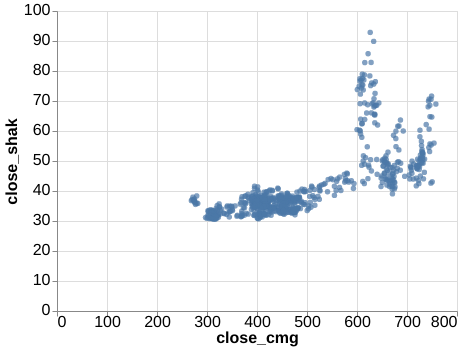

In [10]:
alt.Chart(neo_table).mark_circle().encode(
    x='close_cmg',
    y='close_shak'
)